# DataFrame Precio compraventa viviendas Registradas

**El objetivo de este proyecto es modelar, limpiar y analizar los datos que van a ser útiles para el analisis final. Y convertirlo en un solo dataframe.**

Lo primero que vamos a realizar es cargar las librerias que vamos a utilizar. Y cargar los datasets que tenemos en formato cvs. del Número de fincas según régimen de propiedad de cada año (2018,2019,2020,2021,2022). 

En este caso, tenemos el dataset del 2018 con la suma de todo el año. En cambio el resto de datasets 2019,2020,2021 y 2021 los tenemos divididos por trimestres.

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

df_1 = pd.read_csv("2018_comp_vend_preu.csv")
df_2 = pd.read_csv("2019_comp_vend_preu_trim.csv")
df_3 = pd.read_csv("2020_comp_vend_preu_trim.csv")
df_4 = pd.read_csv("2021_comp_vend_preu_trim.csv")
df_5 = pd.read_csv("2022_comp_vend_preu_trim.csv")


## 1. Modelar y limpiar datos:

**1.1** Viaualizamos los datos del df_1 observamos que la columna 'Preu_mitja_habitatge' tiene diferentes  con diferentes valores, y lo que haremos será convertirlo en columnas, y eliminar la columna 'valor' para que los valores vayan en las filas correspondientes. Esto nos generarán filas con Valor NaN, los cuales convertiremos en 0. 

**Dataset df_1 año 2018**

In [239]:
df_1

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mitja_habitatge,Valor
0,2018,1,Ciutat Vella,1,el Raval,Total. Milers d'euros,262.8
1,2018,1,Ciutat Vella,2,el Barri Gòtic,Total. Milers d'euros,541.6
2,2018,1,Ciutat Vella,3,la Barceloneta,Total. Milers d'euros,219.7
3,2018,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total. Milers d'euros,336.9
4,2018,2,Eixample,5,el Fort Pienc,Total. Milers d'euros,408.1
...,...,...,...,...,...,...,...
433,2018,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Usat. Euros/m2 construït,5745.9
434,2018,10,Sant Martí,70,el Besòs i el Maresme,Usat. Euros/m2 construït,2987.7
435,2018,10,Sant Martí,71,Provençals del Poblenou,Usat. Euros/m2 construït,4258.1
436,2018,10,Sant Martí,72,Sant Martí de Provençals,Usat. Euros/m2 construït,3358.2


In [240]:
diferentes_precios = df_1['Preu_mitja_habitatge'].unique()

print(diferentes_precios)

["Total. Milers d'euros" "Nou. Milers d'euros" "Usat. Milers d'euros"
 'Total. Euros/m2 construït' 'Nou. Euros/m2 construït'
 'Usat. Euros/m2 construït']


A continuación vamos a eliminar las columnas que no nos sirven. Con la función **drop()** en este caso como son dos columnas, solo vamos a introduccir en el apartado labels el nombre de las columnas,y en axis = 1. La sintaxis básica del método drop() es la siguiente:

**DataFrame.drop(labels, axis=0, inplace=False)**

In [241]:
df_1 = df_1.drop(["Codi_Districte", "Codi_Barri"], axis=1)

print(df_1)


      Any Nom_Districte                                     Nom_Barri  \
0    2018  Ciutat Vella                                      el Raval   
1    2018  Ciutat Vella                                el Barri Gòtic   
2    2018  Ciutat Vella                                la Barceloneta   
3    2018  Ciutat Vella         Sant Pere, Santa Caterina i la Ribera   
4    2018      Eixample                                 el Fort Pienc   
..    ...           ...                                           ...   
433  2018    Sant Martí  Diagonal Mar i el Front Marítim del Poblenou   
434  2018    Sant Martí                         el Besòs i el Maresme   
435  2018    Sant Martí                       Provençals del Poblenou   
436  2018    Sant Martí                      Sant Martí de Provençals   
437  2018    Sant Martí                           la Verneda i la Pau   

         Preu_mitja_habitatge   Valor  
0       Total. Milers d'euros   262.8  
1       Total. Milers d'euros   541.6  
2  

A continuación vamos a utilizar la función pivot para convertir los datos de la columna 'Preu_mitja_habitatge' en columnas. La sintaxis de la función **pivot()** para nuestro caso es la siguiente:

**pivote = df_1.pivot(index=['Columna_índice_1', 'Columna_índice_2'], columns='Columna_pivote', values='Columna_valor')**

*Reiniciar los índices y dar nombres a las columnas*

**pivote = pivote.reset_index()
pivote.columns.name = None**

In [242]:
pivote = df_1.pivot(index= ['Any','Nom_Barri'], columns='Preu_mitja_habitatge', values='Valor')

# Reiniciar los índices y dar nombres a las columnas
pivote = pivote.reset_index()
pivote.columns.name = None

# Visualizar el nuevo dataframe pivote
print(pivote)

     Any                      Nom_Barri  Nou. Euros/m2 construït  \
0   2018                  Baró de Viver                      NaN   
1   2018                       Can Baró                      NaN   
2   2018                    Can Peguera                      NaN   
3   2018                      Canyelles                      NaN   
4   2018               Ciutat Meridiana                      NaN   
..   ...                            ...                      ...   
68  2018  la Vila Olímpica del Poblenou                      NaN   
69  2018              la Vila de Gràcia                   4757.1   
70  2018                      les Corts                   5896.0   
71  2018                   les Roquetes                      NaN   
72  2018                les Tres Torres                      NaN   

    Nou. Milers d'euros  Total. Euros/m2 construït  Total. Milers d'euros  \
0                   NaN                     3196.1                  281.3   
1                   NaN      

Cambiamos el nombre de las columnas, para que sean más claros los datos. Es el único dataframe que tenemos precio.

In [243]:
nuevos_nombres = {
    'Nou. Euros/m2 construït': 'Obra_Nova_€/m2',
    'Nou. Milers d\'euros': 'Total_Obra_Nova_Milers_€',
    'Usat. Euros/m2 construït': '2ª_Ma_€/m2',
    'Usat. Milers d\'euros': 'Total_2ª_Ma_Milers_€',
    'Total. Euros/m2 construït': 'Total_€/m2_Milers_€',
    'Total. Milers d\'euros': 'Total_Milers_€'
}
df_1_pivot = pivote.rename(columns=nuevos_nombres)

print(df_1_pivot)


     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  Total_€/m2_Milers_€  Total_Milers_€  2ª_Ma_€/m2  \
0                        NaN               3196.1           281.3      3196.1   
1                        NaN               3266.0           212.7      3266.0   
2                        NaN               1542.

Cambiamos el orden de las columnas.

In [244]:
columnas_deseadas = ['Any', 'Nom_Barri', 'Obra_Nova_€/m2', 'Total_Obra_Nova_Milers_€', '2ª_Ma_€/m2', 'Total_2ª_Ma_Milers_€', 'Total_€/m2_Milers_€', 'Total_Milers_€']
df_1_pivot = df_1_pivot[columnas_deseadas]

print(df_1_pivot)


     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  2ª_Ma_€/m2  Total_2ª_Ma_Milers_€  \
0                        NaN      3196.1                 281.3   
1                        NaN      3266.0                 212.7   
2                        NaN      1542.0                 101.8   
3                        Na

# Gráfica de barras y puntos.

Analizamos a través de una gráfica de barras y puntos. Donde interpretamos los valores en Miles de € el Total obranueva y 2ª Mano. Los puntos, interpretamos el precio €/m2 de obra nueva y de 2ª Mano.

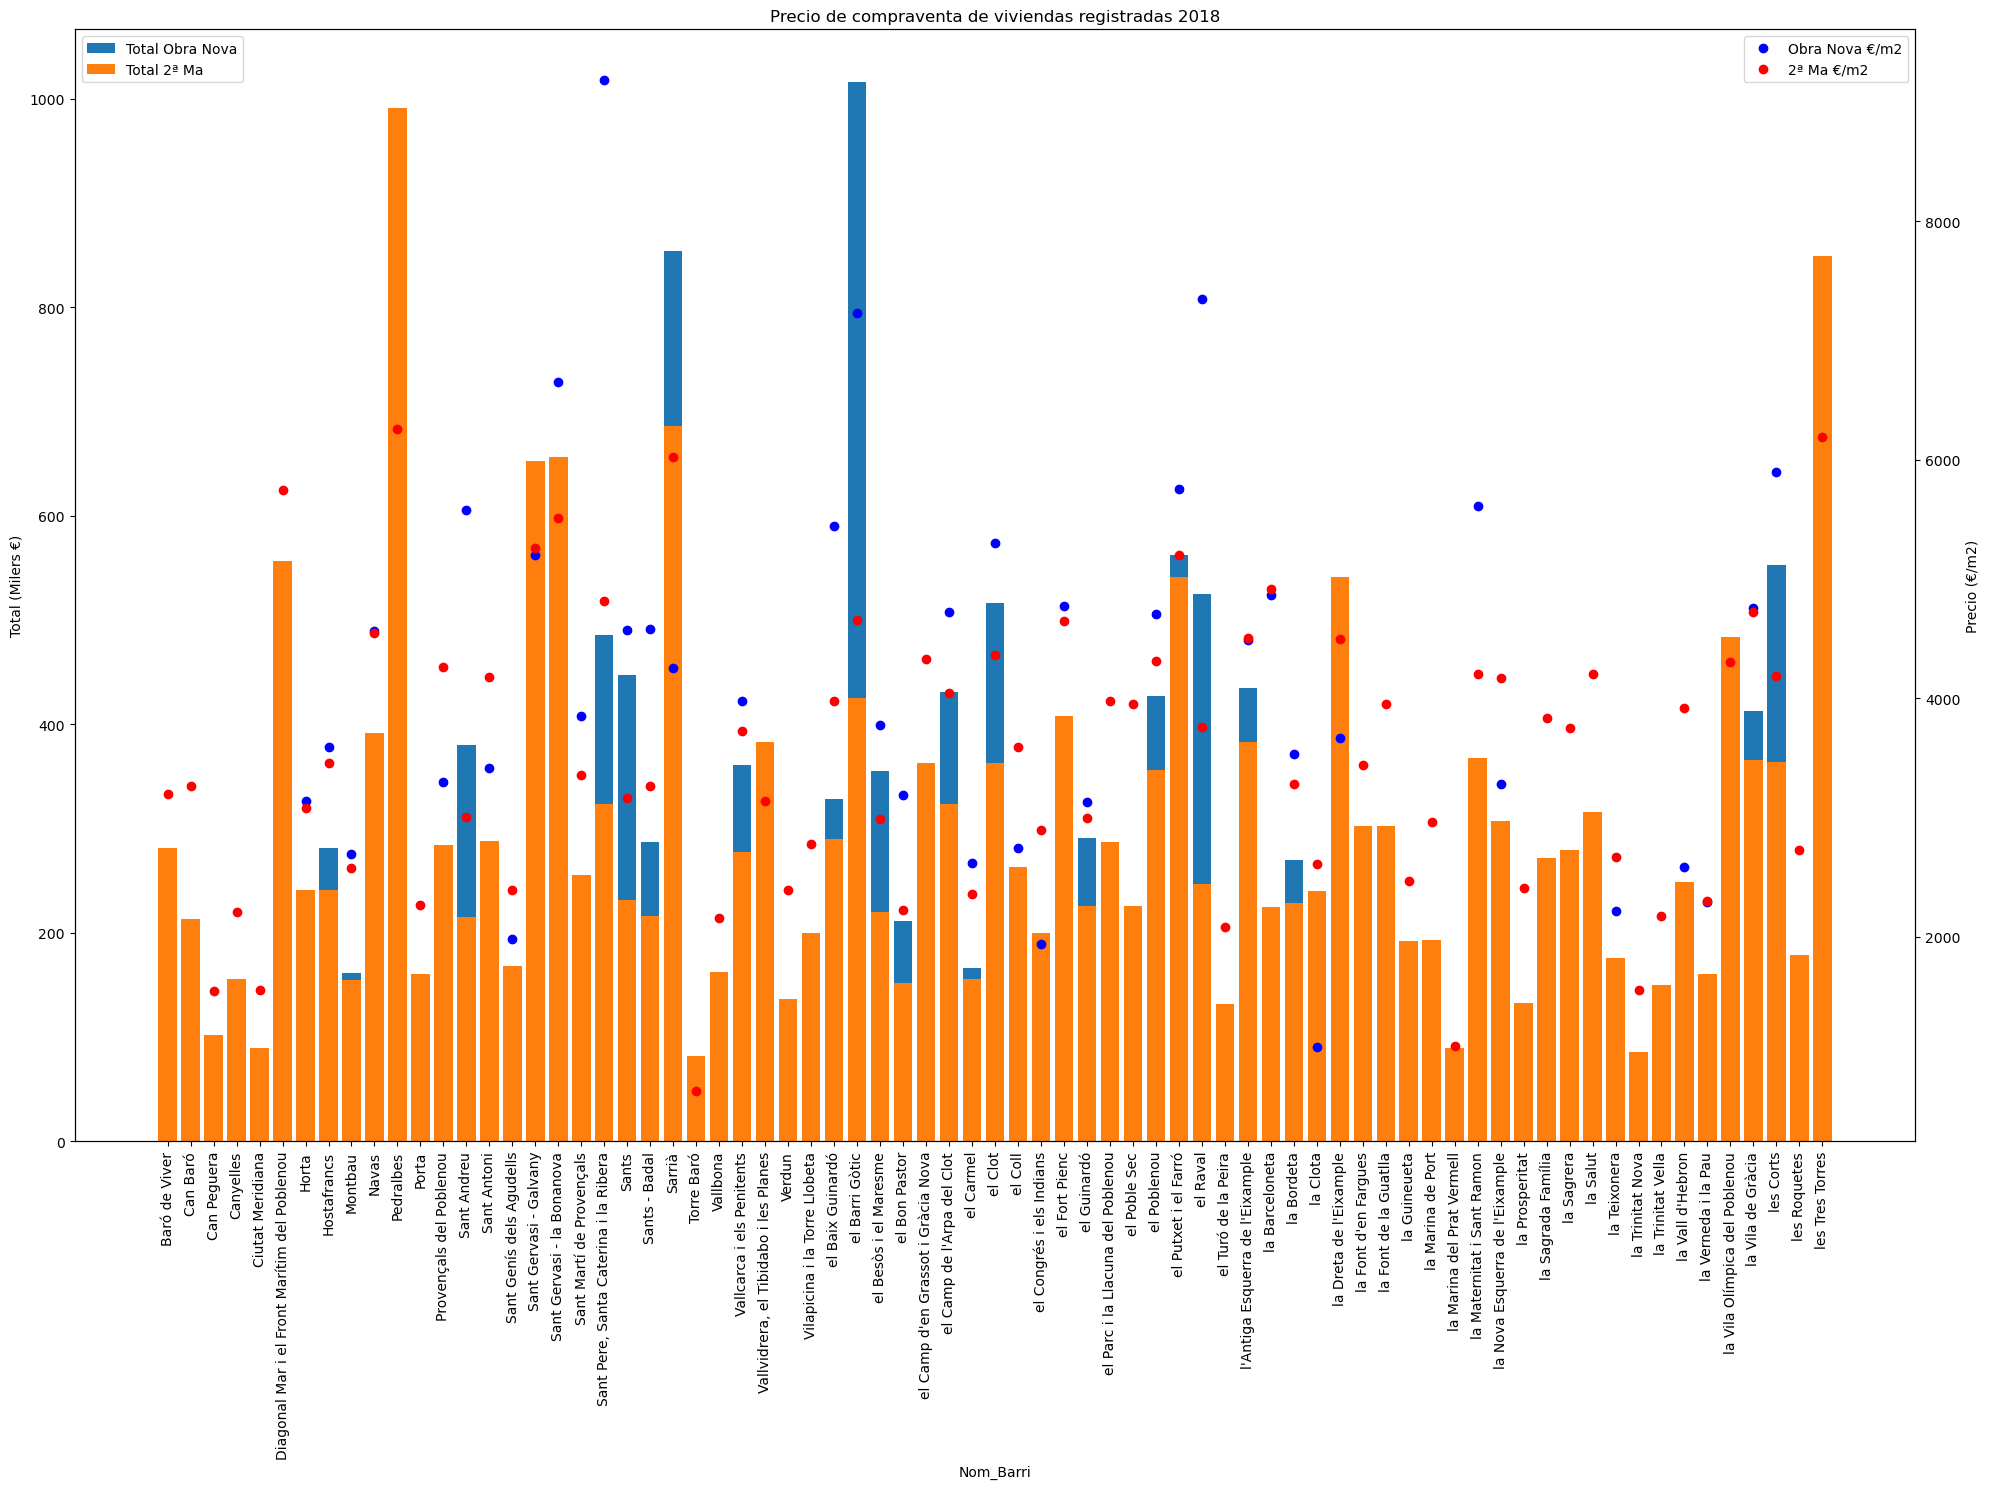

In [245]:
# Filtramos los datos para omitir los valores igual a cero
filtered_df = df_1_pivot[df_1_pivot != 0]

# Estos son los datos de ejemplo filtrados
nom_barri = filtered_df['Nom_Barri']
total_obra_nova = filtered_df['Total_Obra_Nova_Milers_€']
total_2a_ma = filtered_df['Total_2ª_Ma_Milers_€']
obra_nova_precio_m2 = filtered_df['Obra_Nova_€/m2']
ma_precio_m2 = filtered_df['2ª_Ma_€/m2']

# Creamos la figura con tamaño personalizado
fig, ax1 = plt.subplots(figsize=(20, 15))

# Le decimos que valores deben de tener la grafica de barras / Graficar barras.
ax1.bar(nom_barri, total_obra_nova, label='Total Obra Nova')
ax1.bar(nom_barri, total_2a_ma, label='Total 2ª Ma')
ax1.set_ylabel('Total (Milers €)')

# Creamos el segundo eje y graficar puntos
ax2 = ax1.twinx()
ax2.plot(nom_barri, obra_nova_precio_m2, marker='o', linestyle='None', color='blue', label='Obra Nova €/m2')
ax2.plot(nom_barri, ma_precio_m2, marker='o', linestyle='None', color='red', label='2ª Ma €/m2')
ax2.set_ylabel('Precio (€/m2)')

# Rotamos los nombres de los barrios en el eje x para que no se solapen
ax1.set_xticklabels(nom_barri, rotation=90)

# Mostrar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Configurar título y etiquetas de ejes
plt.title('Precio de compraventa de viviendas registradas 2018')
ax1.set_xlabel('Nom_Barri')

# Ajustar el espaciado de los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

**Dataset df_2 año 2019**

In [246]:
df_2

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mitja_habitatge,Valor
0,2019,1,1,Ciutat Vella,1,el Raval,Total. Milers d'euros,236.7
1,2019,1,1,Ciutat Vella,2,el Barri Gòtic,Total. Milers d'euros,411.7
2,2019,1,1,Ciutat Vella,3,la Barceloneta,Total. Milers d'euros,215.6
3,2019,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total. Milers d'euros,306.0
4,2019,1,2,Eixample,5,el Fort Pienc,Total. Milers d'euros,582.2
...,...,...,...,...,...,...,...,...
1747,2019,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Usat. Euros/m2 construït,5778.6
1748,2019,4,10,Sant Martí,70,el Besòs i el Maresme,Usat. Euros/m2 construït,3030.9
1749,2019,4,10,Sant Martí,71,Provençals del Poblenou,Usat. Euros/m2 construït,NaN
1750,2019,4,10,Sant Martí,72,Sant Martí de Provençals,Usat. Euros/m2 construït,3555.6


In [247]:
df_2 = df_2.drop(["Codi_Districte", "Codi_Barri"], axis=1)

print(df_2)

       Any  Trimestre Nom_Districte  \
0     2019          1  Ciutat Vella   
1     2019          1  Ciutat Vella   
2     2019          1  Ciutat Vella   
3     2019          1  Ciutat Vella   
4     2019          1      Eixample   
...    ...        ...           ...   
1747  2019          4    Sant Martí   
1748  2019          4    Sant Martí   
1749  2019          4    Sant Martí   
1750  2019          4    Sant Martí   
1751  2019          4    Sant Martí   

                                         Nom_Barri      Preu_mitja_habitatge  \
0                                         el Raval     Total. Milers d'euros   
1                                   el Barri Gòtic     Total. Milers d'euros   
2                                   la Barceloneta     Total. Milers d'euros   
3            Sant Pere, Santa Caterina i la Ribera     Total. Milers d'euros   
4                                    el Fort Pienc     Total. Milers d'euros   
...                                            ... 

In [248]:
nuevos_nombres = {
    'Nou. Euros/m2 construït': 'Obra_Nova_€/m2',
    'Nou. Milers d\'euros': 'Total_Obra_Nova_Milers_€',
    'Usat. Euros/m2 construït': '2ª_Ma_€/m2',
    'Usat. Milers d\'euros': 'Total_2ª_Ma_Milers_€',
    'Total. Euros/m2 construït': 'Total_€/m2_Milers_€',
    'Total. Milers d\'euros': 'Total_Milers_€'
}
df_2_pivot = pivote.rename(columns=nuevos_nombres)

print(df_2_pivot)

     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  Total_€/m2_Milers_€  Total_Milers_€  2ª_Ma_€/m2  \
0                        NaN               3196.1           281.3      3196.1   
1                        NaN               3266.0           212.7      3266.0   
2                        NaN               1542.

In [249]:
columnas_deseadas = ['Any', 'Nom_Barri', 'Obra_Nova_€/m2', 'Total_Obra_Nova_Milers_€', '2ª_Ma_€/m2', 'Total_2ª_Ma_Milers_€', 'Total_€/m2_Milers_€', 'Total_Milers_€']
df_2_pivot = df_2_pivot[columnas_deseadas]

print(df_2_pivot)

     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  2ª_Ma_€/m2  Total_2ª_Ma_Milers_€  \
0                        NaN      3196.1                 281.3   
1                        NaN      3266.0                 212.7   
2                        NaN      1542.0                 101.8   
3                        Na

In [250]:
import pandas as pd

# Agrupar los datos por "Nom_Barri" y "Any" y calcular la media de cada grupo
df_media = df_2_pivot.groupby(['Any','Nom_Barri']).mean()

# Calcular el precio medio dividiendo la suma por el número de trimestres (en este caso, 4)
df_2_precio_medio = df_media.div(4)

# Redondear el precio medio a un decimal
df_2_precio_medio = df_media.round(1)

# Restablecer el índice del DataFrame
df_2_precio_medio = df_2_precio_medio.reset_index()

# Imprimir el resultado
print("Precio medio por barrio para cada columna:")
print(df_2_precio_medio)

Precio medio por barrio para cada columna:
     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  2ª_Ma_€/m2  Total_2ª_Ma_Milers_€  \
0                        NaN      3196.1                 281.3   
1                        NaN      3266.0                 212.7   
2                        NaN      1542.0          

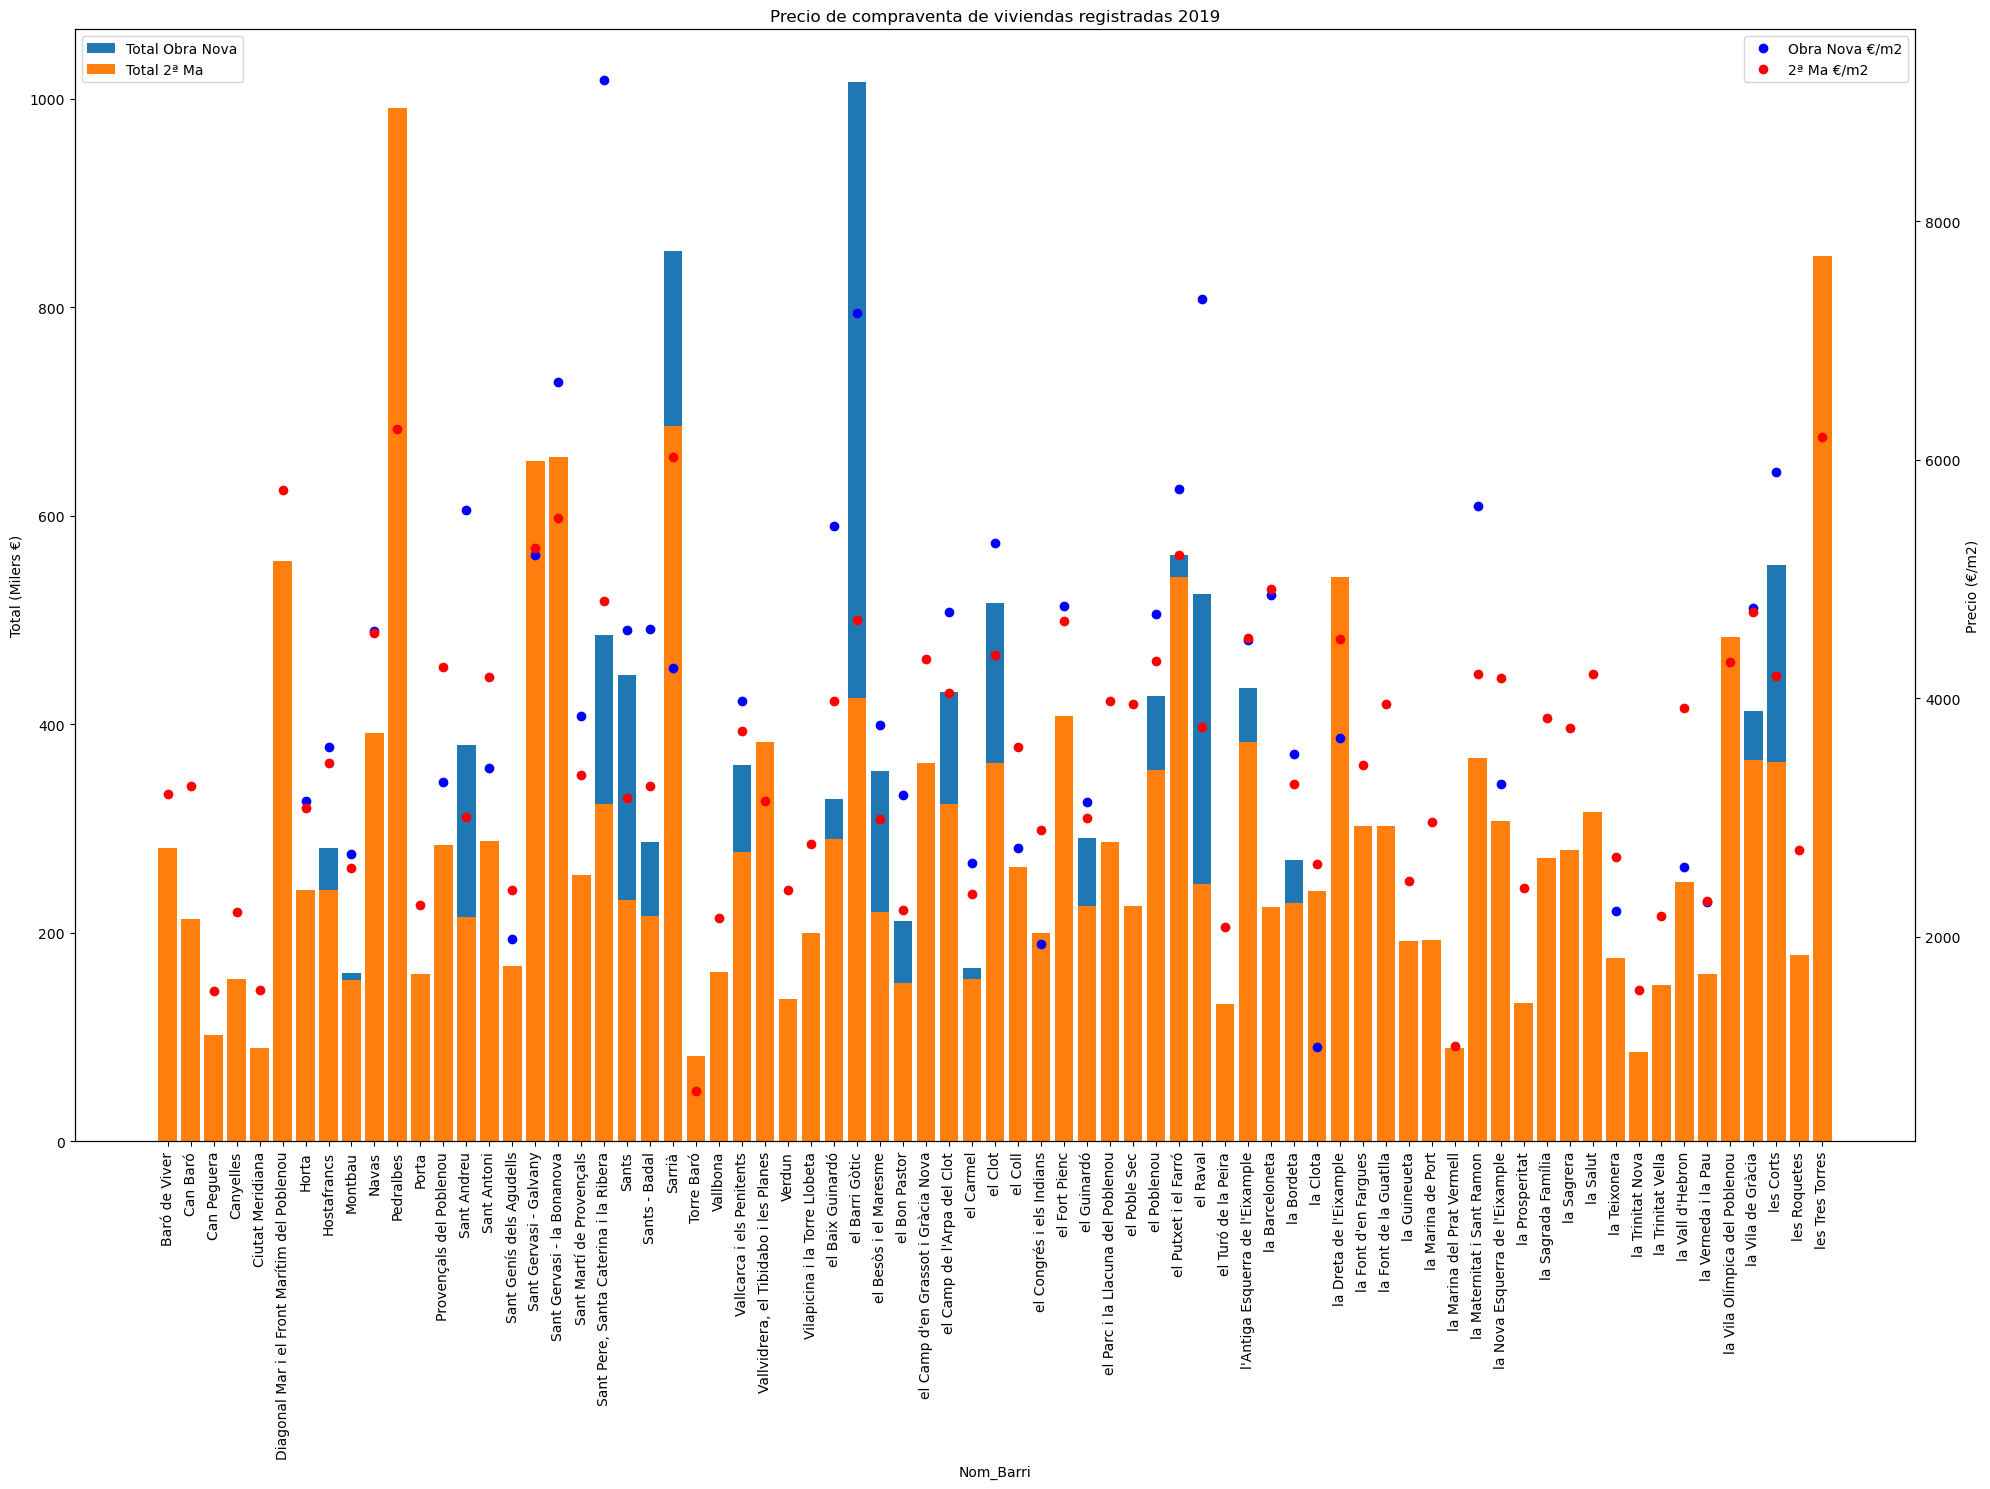

In [251]:
# Filtramos los datos para omitir los valores igual a cero
filtered_df = df_2_precio_medio[df_2_precio_medio != 0]

# Estos son los datos de ejemplo filtrados
nom_barri = filtered_df['Nom_Barri']
total_obra_nova = filtered_df['Total_Obra_Nova_Milers_€']
total_2a_ma = filtered_df['Total_2ª_Ma_Milers_€']
obra_nova_precio_m2 = filtered_df['Obra_Nova_€/m2']
ma_precio_m2 = filtered_df['2ª_Ma_€/m2']

# Creamos la figura con tamaño personalizado
fig, ax1 = plt.subplots(figsize=(20, 15))

# Le decimos que valores deben de tener la grafica de barras / Graficar barras.
ax1.bar(nom_barri, total_obra_nova, label='Total Obra Nova')
ax1.bar(nom_barri, total_2a_ma, label='Total 2ª Ma')
ax1.set_ylabel('Total (Milers €)')

# Creamos el segundo eje y graficar puntos
ax2 = ax1.twinx()
ax2.plot(nom_barri, obra_nova_precio_m2, marker='o', linestyle='None', color='blue', label='Obra Nova €/m2')
ax2.plot(nom_barri, ma_precio_m2, marker='o', linestyle='None', color='red', label='2ª Ma €/m2')
ax2.set_ylabel('Precio (€/m2)')

# Rotamos los nombres de los barrios en el eje x para que no se solapen
ax1.set_xticklabels(nom_barri, rotation=90)

# Mostrar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Configurar título y etiquetas de ejes
plt.title('Precio de compraventa de viviendas registradas 2019')
ax1.set_xlabel('Nom_Barri')

# Ajustar el espaciado de los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

**Dataset df_3 año 2020**

In [252]:
df_3

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mitja_habitatge,Valor
0,2020,1,1,Ciutat Vella,1,el Raval,Total. Milers d'euros,194.1
1,2020,1,1,Ciutat Vella,2,el Barri Gòtic,Total. Milers d'euros,377.7
2,2020,1,1,Ciutat Vella,3,la Barceloneta,Total. Milers d'euros,215.2
3,2020,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total. Milers d'euros,305.4
4,2020,1,2,Eixample,5,el Fort Pienc,Total. Milers d'euros,480.0
...,...,...,...,...,...,...,...,...
1747,2020,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Usat. Euros/m2 construït,5847.3
1748,2020,4,10,Sant Martí,70,el Besòs i el Maresme,Usat. Euros/m2 construït,2551.9
1749,2020,4,10,Sant Martí,71,Provençals del Poblenou,Usat. Euros/m2 construït,3542.4
1750,2020,4,10,Sant Martí,72,Sant Martí de Provençals,Usat. Euros/m2 construït,2664.0


In [253]:
df_3 = df_3.drop(["Codi_Districte", "Codi_Barri"], axis=1)

print(df_3)

       Any  Trimestre Nom_Districte  \
0     2020          1  Ciutat Vella   
1     2020          1  Ciutat Vella   
2     2020          1  Ciutat Vella   
3     2020          1  Ciutat Vella   
4     2020          1      Eixample   
...    ...        ...           ...   
1747  2020          4    Sant Martí   
1748  2020          4    Sant Martí   
1749  2020          4    Sant Martí   
1750  2020          4    Sant Martí   
1751  2020          4    Sant Martí   

                                         Nom_Barri      Preu_mitja_habitatge  \
0                                         el Raval     Total. Milers d'euros   
1                                   el Barri Gòtic     Total. Milers d'euros   
2                                   la Barceloneta     Total. Milers d'euros   
3            Sant Pere, Santa Caterina i la Ribera     Total. Milers d'euros   
4                                    el Fort Pienc     Total. Milers d'euros   
...                                            ... 

In [254]:
nuevos_nombres = {
    'Nou. Euros/m2 construït': 'Obra_Nova_€/m2',
    'Nou. Milers d\'euros': 'Total_Obra_Nova_Milers_€',
    'Usat. Euros/m2 construït': '2ª_Ma_€/m2',
    'Usat. Milers d\'euros': 'Total_2ª_Ma_Milers_€',
    'Total. Euros/m2 construït': 'Total_€/m2_Milers_€',
    'Total. Milers d\'euros': 'Total_Milers_€'
}
df_3_pivot = pivote.rename(columns=nuevos_nombres)

print(df_3_pivot)

     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  Total_€/m2_Milers_€  Total_Milers_€  2ª_Ma_€/m2  \
0                        NaN               3196.1           281.3      3196.1   
1                        NaN               3266.0           212.7      3266.0   
2                        NaN               1542.

In [255]:
columnas_deseadas = ['Any', 'Nom_Barri', 'Obra_Nova_€/m2', 'Total_Obra_Nova_Milers_€', '2ª_Ma_€/m2', 'Total_2ª_Ma_Milers_€', 'Total_€/m2_Milers_€', 'Total_Milers_€']
df_3_pivot = df_3_pivot[columnas_deseadas]

print(df_3_pivot)

     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  2ª_Ma_€/m2  Total_2ª_Ma_Milers_€  \
0                        NaN      3196.1                 281.3   
1                        NaN      3266.0                 212.7   
2                        NaN      1542.0                 101.8   
3                        Na

In [256]:
# Agrupar los datos por "Nom_Barri" y "Any" y calcular la media de cada grupo
df_media = df_3_pivot.groupby(['Any','Nom_Barri']).mean()

# Calcular el precio medio dividiendo la suma por el número de trimestres (en este caso, 4)
df_3_precio_medio = df_media.div(4)

# Redondear el precio medio a un decimal
df_3_precio_medio = df_media.round(1)

# Restablecer el índice del DataFrame
df_3_precio_medio = df_3_precio_medio.reset_index()

# Imprimir el resultado
print("Precio medio por barrio para cada columna:")
print(df_3_precio_medio)

Precio medio por barrio para cada columna:
     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  2ª_Ma_€/m2  Total_2ª_Ma_Milers_€  \
0                        NaN      3196.1                 281.3   
1                        NaN      3266.0                 212.7   
2                        NaN      1542.0          

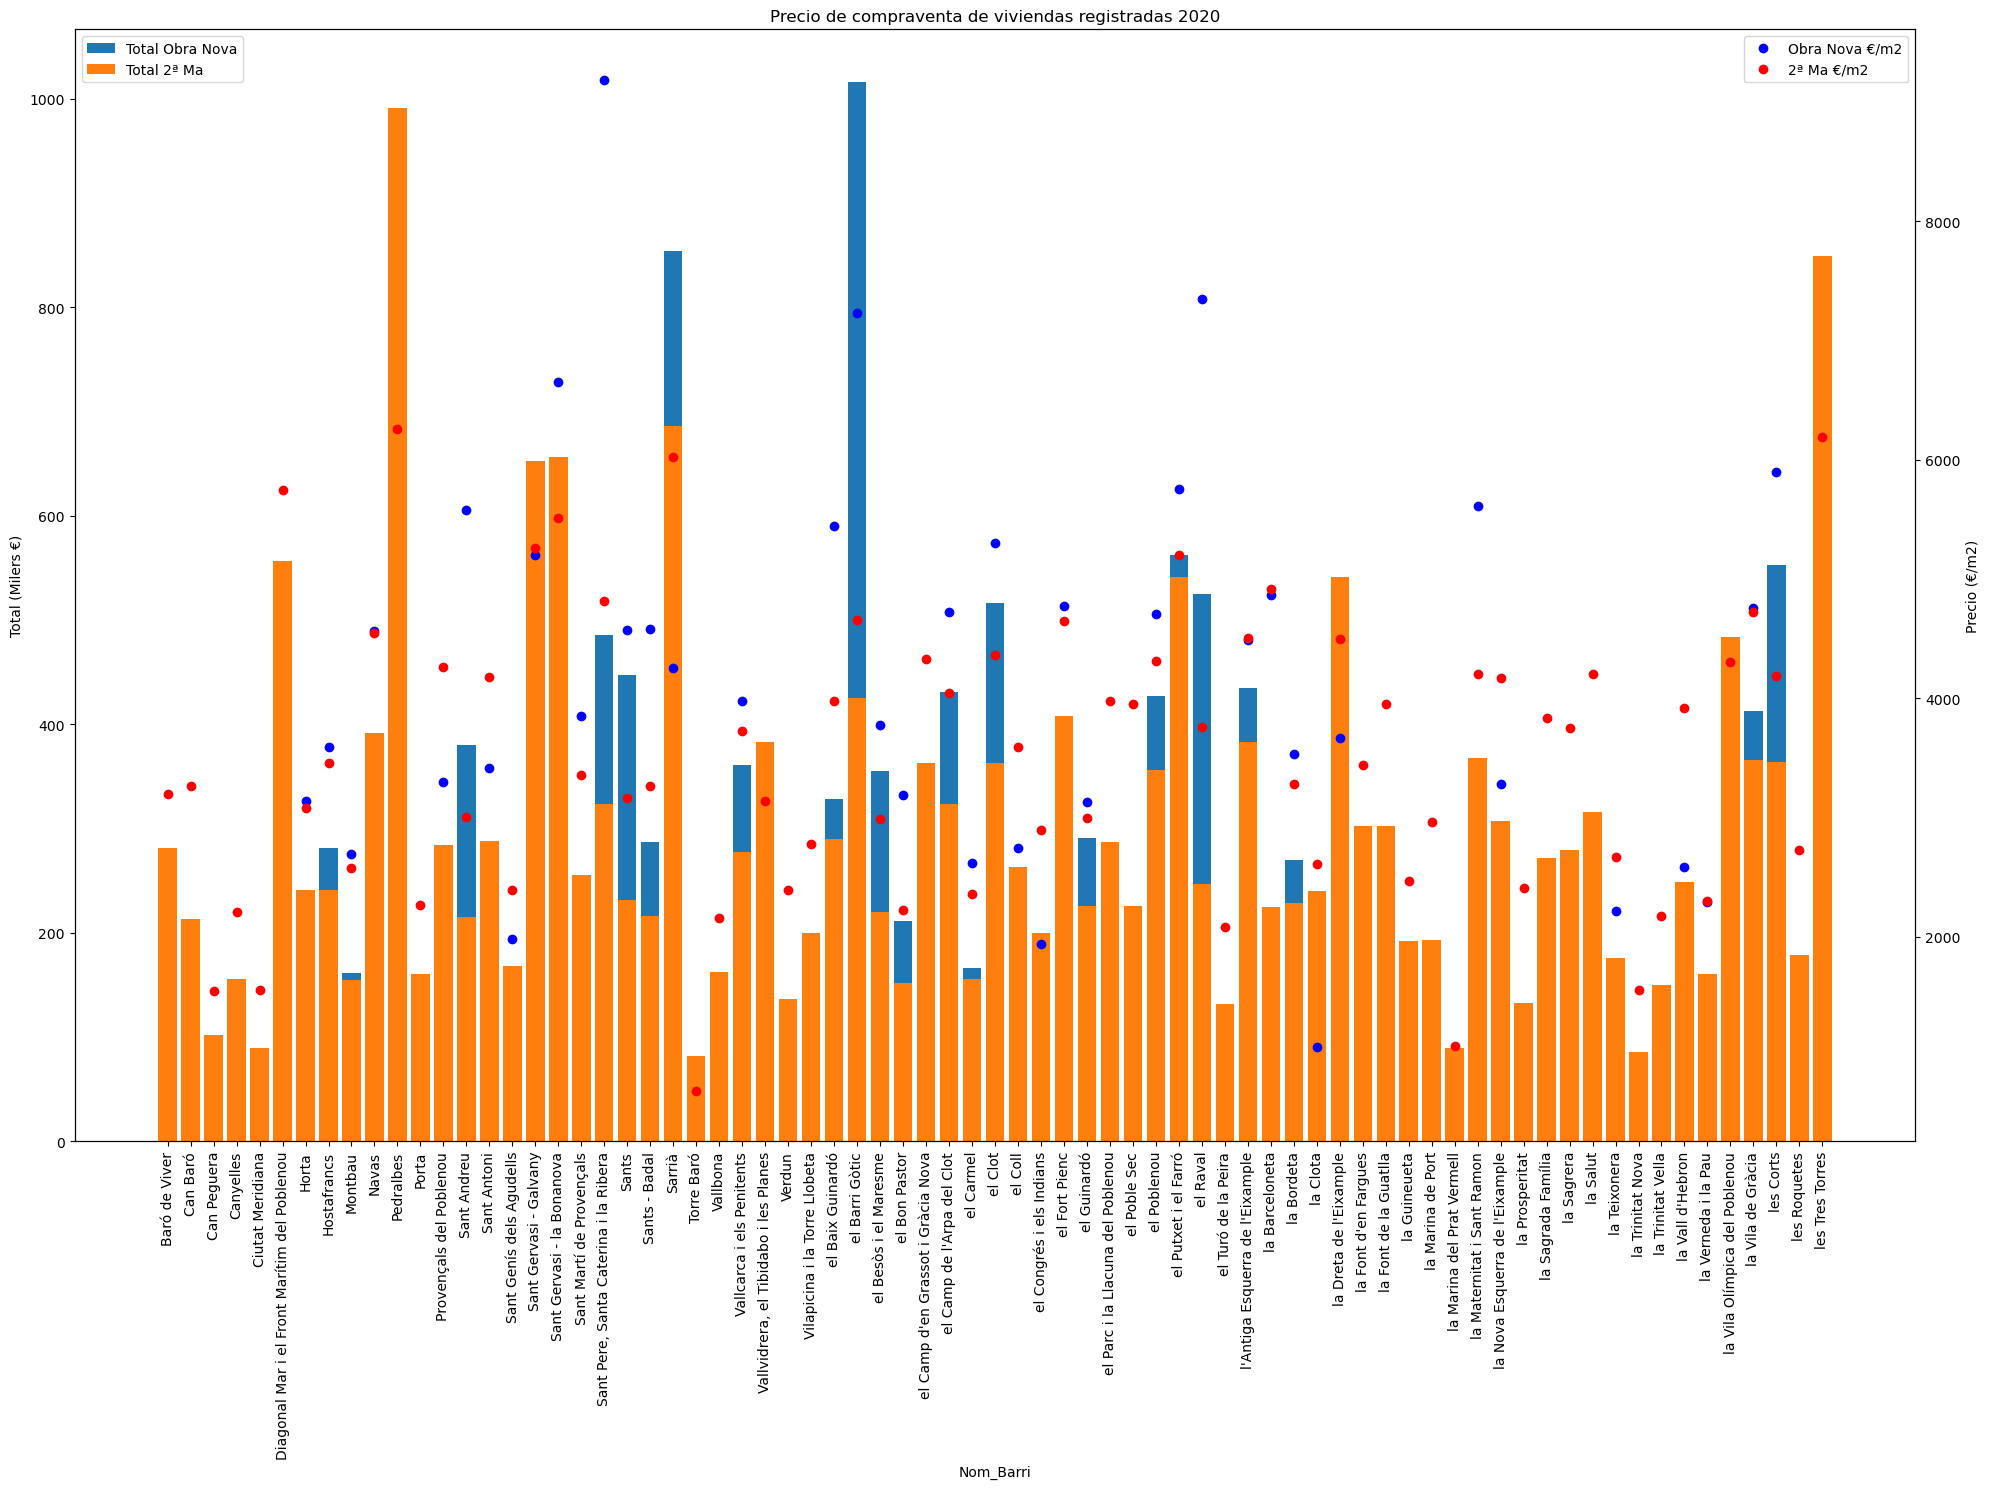

In [257]:
# Filtramos los datos para omitir los valores igual a cero
filtered_df = df_3_precio_medio[df_3_precio_medio != 0]

# Estos son los datos de ejemplo filtrados
nom_barri = filtered_df['Nom_Barri']
total_obra_nova = filtered_df['Total_Obra_Nova_Milers_€']
total_2a_ma = filtered_df['Total_2ª_Ma_Milers_€']
obra_nova_precio_m2 = filtered_df['Obra_Nova_€/m2']
ma_precio_m2 = filtered_df['2ª_Ma_€/m2']

# Creamos la figura con tamaño personalizado
fig, ax1 = plt.subplots(figsize=(20, 15))

# Le decimos que valores deben de tener la grafica de barras / Graficar barras.
ax1.bar(nom_barri, total_obra_nova, label='Total Obra Nova')
ax1.bar(nom_barri, total_2a_ma, label='Total 2ª Ma')
ax1.set_ylabel('Total (Milers €)')

# Creamos el segundo eje y graficar puntos
ax2 = ax1.twinx()
ax2.plot(nom_barri, obra_nova_precio_m2, marker='o', linestyle='None', color='blue', label='Obra Nova €/m2')
ax2.plot(nom_barri, ma_precio_m2, marker='o', linestyle='None', color='red', label='2ª Ma €/m2')
ax2.set_ylabel('Precio (€/m2)')

# Rotamos los nombres de los barrios en el eje x para que no se solapen
ax1.set_xticklabels(nom_barri, rotation=90)

# Mostrar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Configurar título y etiquetas de ejes
plt.title('Precio de compraventa de viviendas registradas 2020')
ax1.set_xlabel('Nom_Barri')

# Ajustar el espaciado de los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

**Dataset df_4 año 2021**

In [258]:
df_4

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mitja_habitatge,Valor
0,2021,1,1,Ciutat Vella,1,el Raval,Total. Milers d'euros,167.5
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Total. Milers d'euros,298.7
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Total. Milers d'euros,184.7
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total. Milers d'euros,254.6
4,2021,1,2,Eixample,5,el Fort Pienc,Total. Milers d'euros,301.8
...,...,...,...,...,...,...,...,...
1747,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Usat. Euros/m2 construït,4303.7
1748,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Usat. Euros/m2 construït,2395.0
1749,2021,4,10,Sant Martí,71,Provençals del Poblenou,Usat. Euros/m2 construït,3805.8
1750,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Usat. Euros/m2 construït,2824.1


In [259]:
df_4 = df_4.drop(["Codi_Districte", "Codi_Barri"], axis=1)

print(df_4)

       Any  Trimestre Nom_Districte  \
0     2021          1  Ciutat Vella   
1     2021          1  Ciutat Vella   
2     2021          1  Ciutat Vella   
3     2021          1  Ciutat Vella   
4     2021          1      Eixample   
...    ...        ...           ...   
1747  2021          4    Sant Martí   
1748  2021          4    Sant Martí   
1749  2021          4    Sant Martí   
1750  2021          4    Sant Martí   
1751  2021          4    Sant Martí   

                                         Nom_Barri      Preu_mitja_habitatge  \
0                                         el Raval     Total. Milers d'euros   
1                                   el Barri Gòtic     Total. Milers d'euros   
2                                   la Barceloneta     Total. Milers d'euros   
3            Sant Pere, Santa Caterina i la Ribera     Total. Milers d'euros   
4                                    el Fort Pienc     Total. Milers d'euros   
...                                            ... 

In [260]:
nuevos_nombres = {
    'Nou. Euros/m2 construït': 'Obra_Nova_€/m2',
    'Nou. Milers d\'euros': 'Total_Obra_Nova_Milers_€',
    'Usat. Euros/m2 construït': '2ª_Ma_€/m2',
    'Usat. Milers d\'euros': 'Total_2ª_Ma_Milers_€',
    'Total. Euros/m2 construït': 'Total_€/m2_Milers_€',
    'Total. Milers d\'euros': 'Total_Milers_€'
}
df_4_pivot = pivote.rename(columns=nuevos_nombres)

print(df_4_pivot)

     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  Total_€/m2_Milers_€  Total_Milers_€  2ª_Ma_€/m2  \
0                        NaN               3196.1           281.3      3196.1   
1                        NaN               3266.0           212.7      3266.0   
2                        NaN               1542.

In [261]:
columnas_deseadas = ['Any', 'Nom_Barri', 'Obra_Nova_€/m2', 'Total_Obra_Nova_Milers_€', '2ª_Ma_€/m2', 'Total_2ª_Ma_Milers_€', 'Total_€/m2_Milers_€', 'Total_Milers_€']
df_4_pivot = df_4_pivot[columnas_deseadas]

print(df_4_pivot)

     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  2ª_Ma_€/m2  Total_2ª_Ma_Milers_€  \
0                        NaN      3196.1                 281.3   
1                        NaN      3266.0                 212.7   
2                        NaN      1542.0                 101.8   
3                        Na

In [262]:
# Agrupar los datos por "Nom_Barri" y "Any" y calcular la media de cada grupo
df_media = df_4_pivot.groupby(['Any','Nom_Barri']).mean()

# Calcular el precio medio dividiendo la suma por el número de trimestres (en este caso, 4)
df_4_precio_medio = df_media.div(4)

# Redondear el precio medio a un decimal
df_4_precio_medio = df_media.round(1)

# Restablecer el índice del DataFrame
df_4_precio_medio = df_4_precio_medio.reset_index()

# Imprimir el resultado
print("Precio medio por barrio para cada columna:")
print(df_4_precio_medio)

Precio medio por barrio para cada columna:
     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  2ª_Ma_€/m2  Total_2ª_Ma_Milers_€  \
0                        NaN      3196.1                 281.3   
1                        NaN      3266.0                 212.7   
2                        NaN      1542.0          

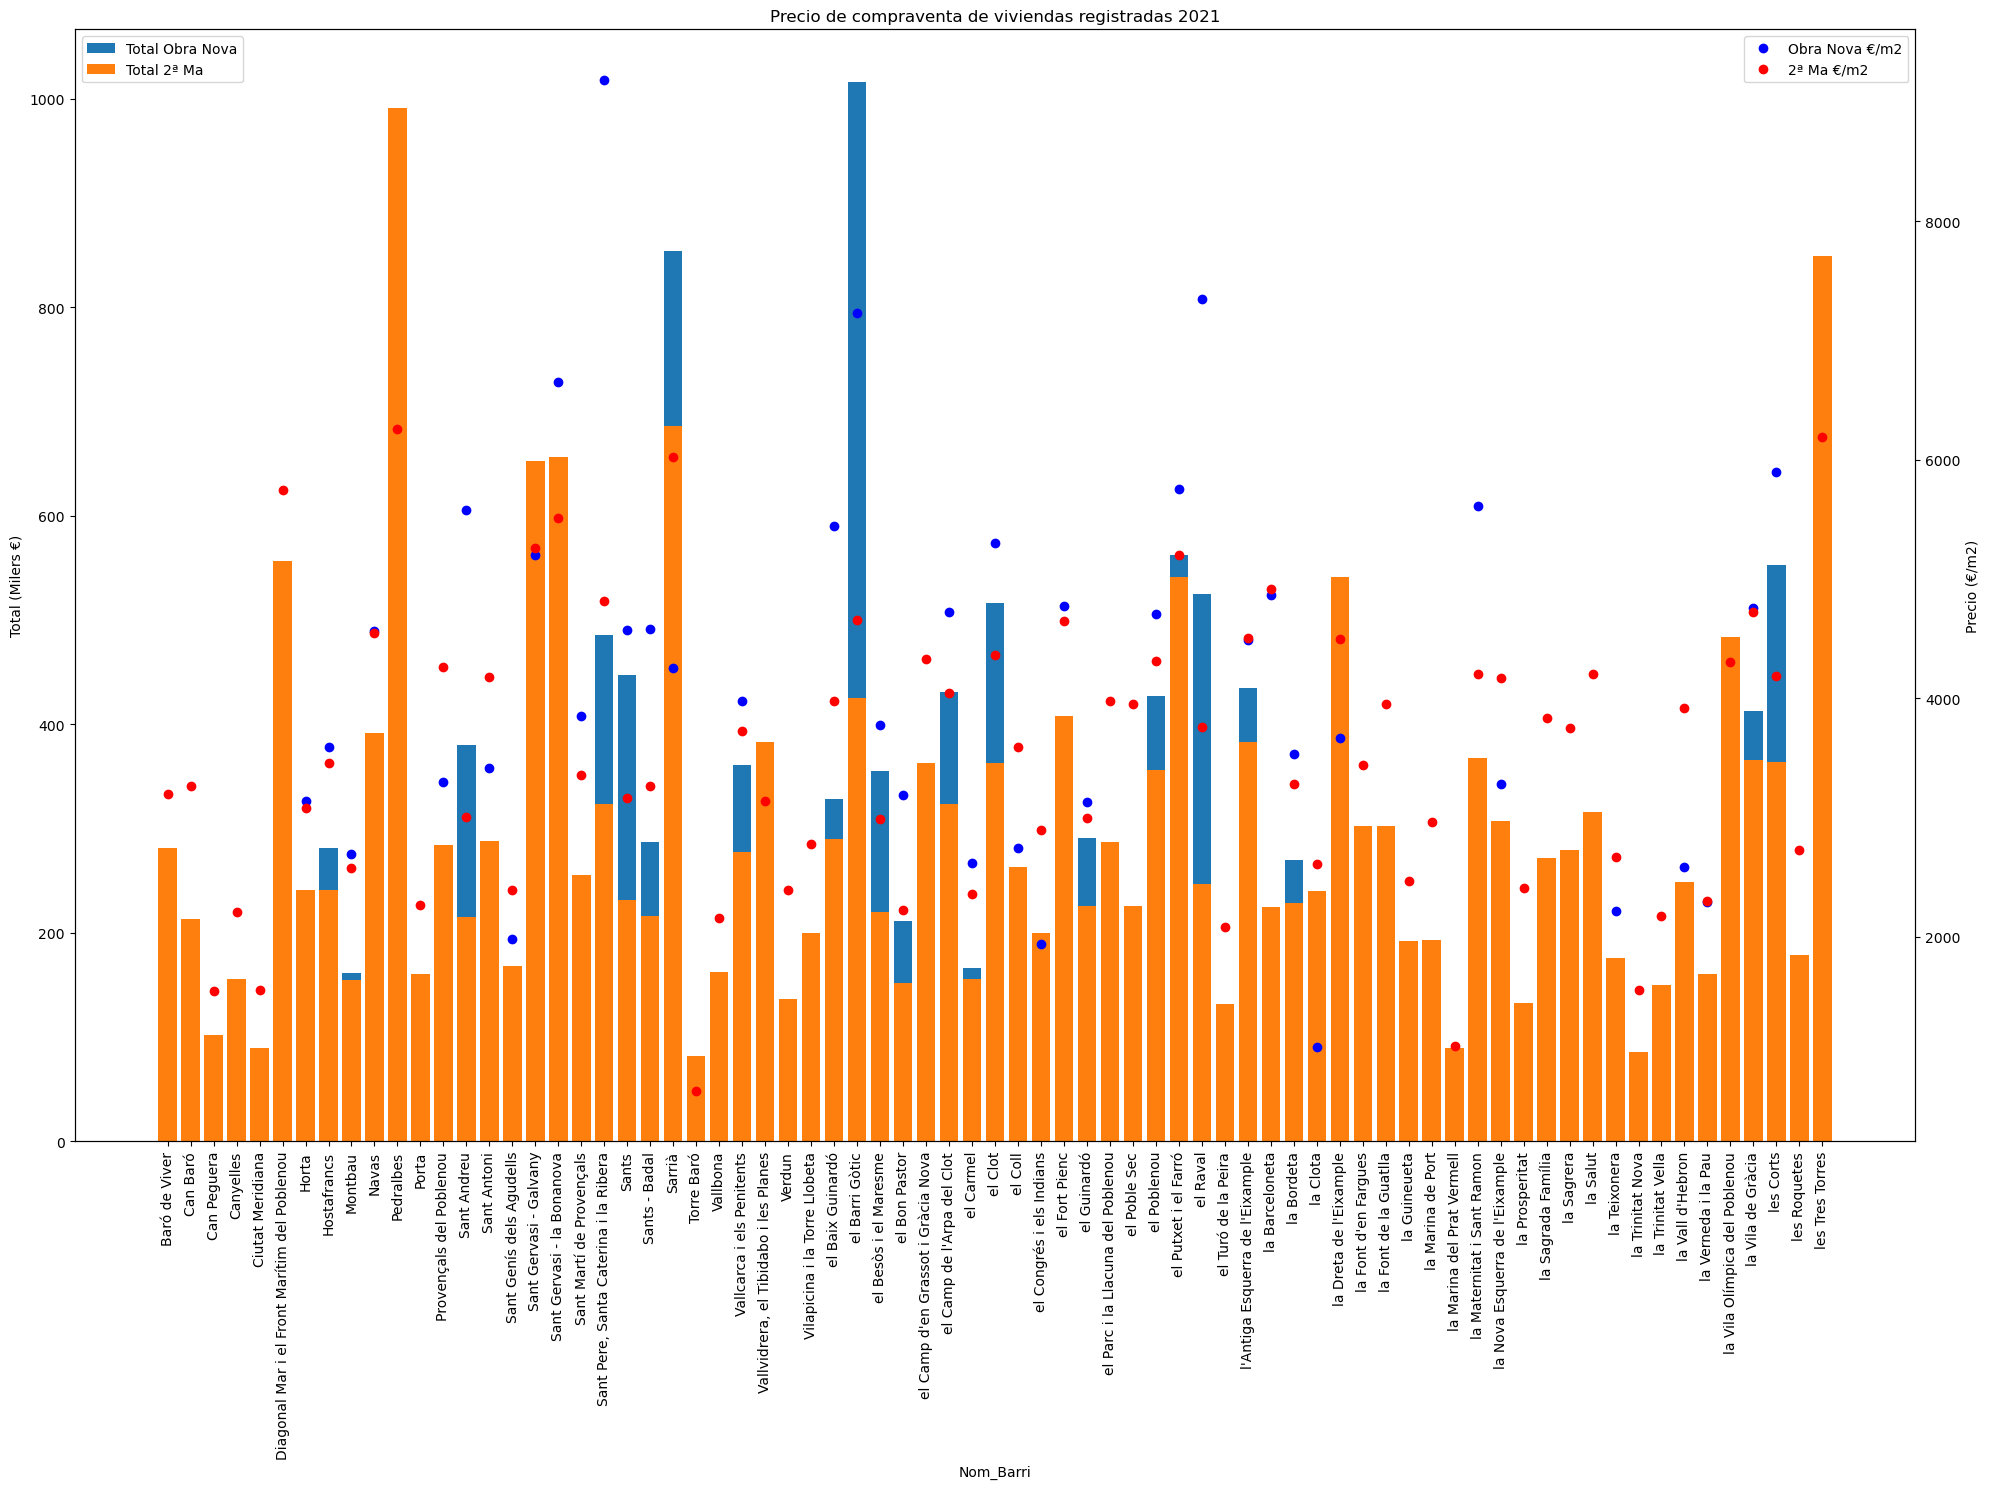

In [263]:
# Filtramos los datos para omitir los valores igual a cero
filtered_df = df_4_precio_medio[df_4_precio_medio != 0]

# Estos son los datos de ejemplo filtrados
nom_barri = filtered_df['Nom_Barri']
total_obra_nova = filtered_df['Total_Obra_Nova_Milers_€']
total_2a_ma = filtered_df['Total_2ª_Ma_Milers_€']
obra_nova_precio_m2 = filtered_df['Obra_Nova_€/m2']
ma_precio_m2 = filtered_df['2ª_Ma_€/m2']

# Creamos la figura con tamaño personalizado
fig, ax1 = plt.subplots(figsize=(20, 15))

# Le decimos que valores deben de tener la grafica de barras / Graficar barras.
ax1.bar(nom_barri, total_obra_nova, label='Total Obra Nova')
ax1.bar(nom_barri, total_2a_ma, label='Total 2ª Ma')
ax1.set_ylabel('Total (Milers €)')

# Creamos el segundo eje y graficar puntos
ax2 = ax1.twinx()
ax2.plot(nom_barri, obra_nova_precio_m2, marker='o', linestyle='None', color='blue', label='Obra Nova €/m2')
ax2.plot(nom_barri, ma_precio_m2, marker='o', linestyle='None', color='red', label='2ª Ma €/m2')
ax2.set_ylabel('Precio (€/m2)')

# Rotamos los nombres de los barrios en el eje x para que no se solapen
ax1.set_xticklabels(nom_barri, rotation=90)

# Mostrar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Configurar título y etiquetas de ejes
plt.title('Precio de compraventa de viviendas registradas 2021')
ax1.set_xlabel('Nom_Barri')

# Ajustar el espaciado de los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

**Dataset df_5 año 2022**

In [264]:
df_5

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mitja_habitatge,Valor
0,2022,1,1,Ciutat Vella,1,el Raval,Total. Milers d'euros,226.1
1,2022,1,1,Ciutat Vella,2,el Barri Gòtic,Total. Milers d'euros,453.0
2,2022,1,1,Ciutat Vella,3,la Barceloneta,Total. Milers d'euros,215.4
3,2022,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total. Milers d'euros,353.3
4,2022,1,2,Eixample,5,el Fort Pienc,Total. Milers d'euros,340.0
...,...,...,...,...,...,...,...,...
1309,2022,3,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Usat. Euros/m2 construït,6396.4
1310,2022,3,10,Sant Martí,70,el Besòs i el Maresme,Usat. Euros/m2 construït,3122.0
1311,2022,3,10,Sant Martí,71,Provençals del Poblenou,Usat. Euros/m2 construït,4052.1
1312,2022,3,10,Sant Martí,72,Sant Martí de Provençals,Usat. Euros/m2 construït,2930.3


In [265]:
df_5 = df_5.drop(["Codi_Districte", "Codi_Barri"], axis=1)

print(df_5)

       Any  Trimestre Nom_Districte  \
0     2022          1  Ciutat Vella   
1     2022          1  Ciutat Vella   
2     2022          1  Ciutat Vella   
3     2022          1  Ciutat Vella   
4     2022          1      Eixample   
...    ...        ...           ...   
1309  2022          3    Sant Martí   
1310  2022          3    Sant Martí   
1311  2022          3    Sant Martí   
1312  2022          3    Sant Martí   
1313  2022          3    Sant Martí   

                                         Nom_Barri      Preu_mitja_habitatge  \
0                                         el Raval     Total. Milers d'euros   
1                                   el Barri Gòtic     Total. Milers d'euros   
2                                   la Barceloneta     Total. Milers d'euros   
3            Sant Pere, Santa Caterina i la Ribera     Total. Milers d'euros   
4                                    el Fort Pienc     Total. Milers d'euros   
...                                            ... 

In [266]:
nuevos_nombres = {
    'Nou. Euros/m2 construït': 'Obra_Nova_€/m2',
    'Nou. Milers d\'euros': 'Total_Obra_Nova_Milers_€',
    'Usat. Euros/m2 construït': '2ª_Ma_€/m2',
    'Usat. Milers d\'euros': 'Total_2ª_Ma_Milers_€',
    'Total. Euros/m2 construït': 'Total_€/m2_Milers_€',
    'Total. Milers d\'euros': 'Total_Milers_€'
}
df_5_pivot = pivote.rename(columns=nuevos_nombres)

print(df_5_pivot)

     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  Total_€/m2_Milers_€  Total_Milers_€  2ª_Ma_€/m2  \
0                        NaN               3196.1           281.3      3196.1   
1                        NaN               3266.0           212.7      3266.0   
2                        NaN               1542.

In [267]:
columnas_deseadas = ['Any', 'Nom_Barri', 'Obra_Nova_€/m2', 'Total_Obra_Nova_Milers_€', '2ª_Ma_€/m2', 'Total_2ª_Ma_Milers_€', 'Total_€/m2_Milers_€', 'Total_Milers_€']
df_5_pivot = df_5_pivot[columnas_deseadas]

print(df_5_pivot)

     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  2ª_Ma_€/m2  Total_2ª_Ma_Milers_€  \
0                        NaN      3196.1                 281.3   
1                        NaN      3266.0                 212.7   
2                        NaN      1542.0                 101.8   
3                        Na

In [268]:
# Agrupar los datos por "Nom_Barri" y "Any" y calcular la media de cada grupo
df_media = df_5_pivot.groupby(['Any','Nom_Barri']).mean()

# Calcular el precio medio dividiendo la suma por el número de trimestres (en este caso, 4)
df_5_precio_medio = df_media.div(4)

# Redondear el precio medio a un decimal
df_5_precio_medio = df_media.round(1)

# Restablecer el índice del DataFrame
df_5_precio_medio = df_5_precio_medio.reset_index()

# Imprimir el resultado
print("Precio medio por barrio para cada columna:")
print(df_5_precio_medio)

Precio medio por barrio para cada columna:
     Any                      Nom_Barri  Obra_Nova_€/m2  \
0   2018                  Baró de Viver             NaN   
1   2018                       Can Baró             NaN   
2   2018                    Can Peguera             NaN   
3   2018                      Canyelles             NaN   
4   2018               Ciutat Meridiana             NaN   
..   ...                            ...             ...   
68  2018  la Vila Olímpica del Poblenou             NaN   
69  2018              la Vila de Gràcia          4757.1   
70  2018                      les Corts          5896.0   
71  2018                   les Roquetes             NaN   
72  2018                les Tres Torres             NaN   

    Total_Obra_Nova_Milers_€  2ª_Ma_€/m2  Total_2ª_Ma_Milers_€  \
0                        NaN      3196.1                 281.3   
1                        NaN      3266.0                 212.7   
2                        NaN      1542.0          

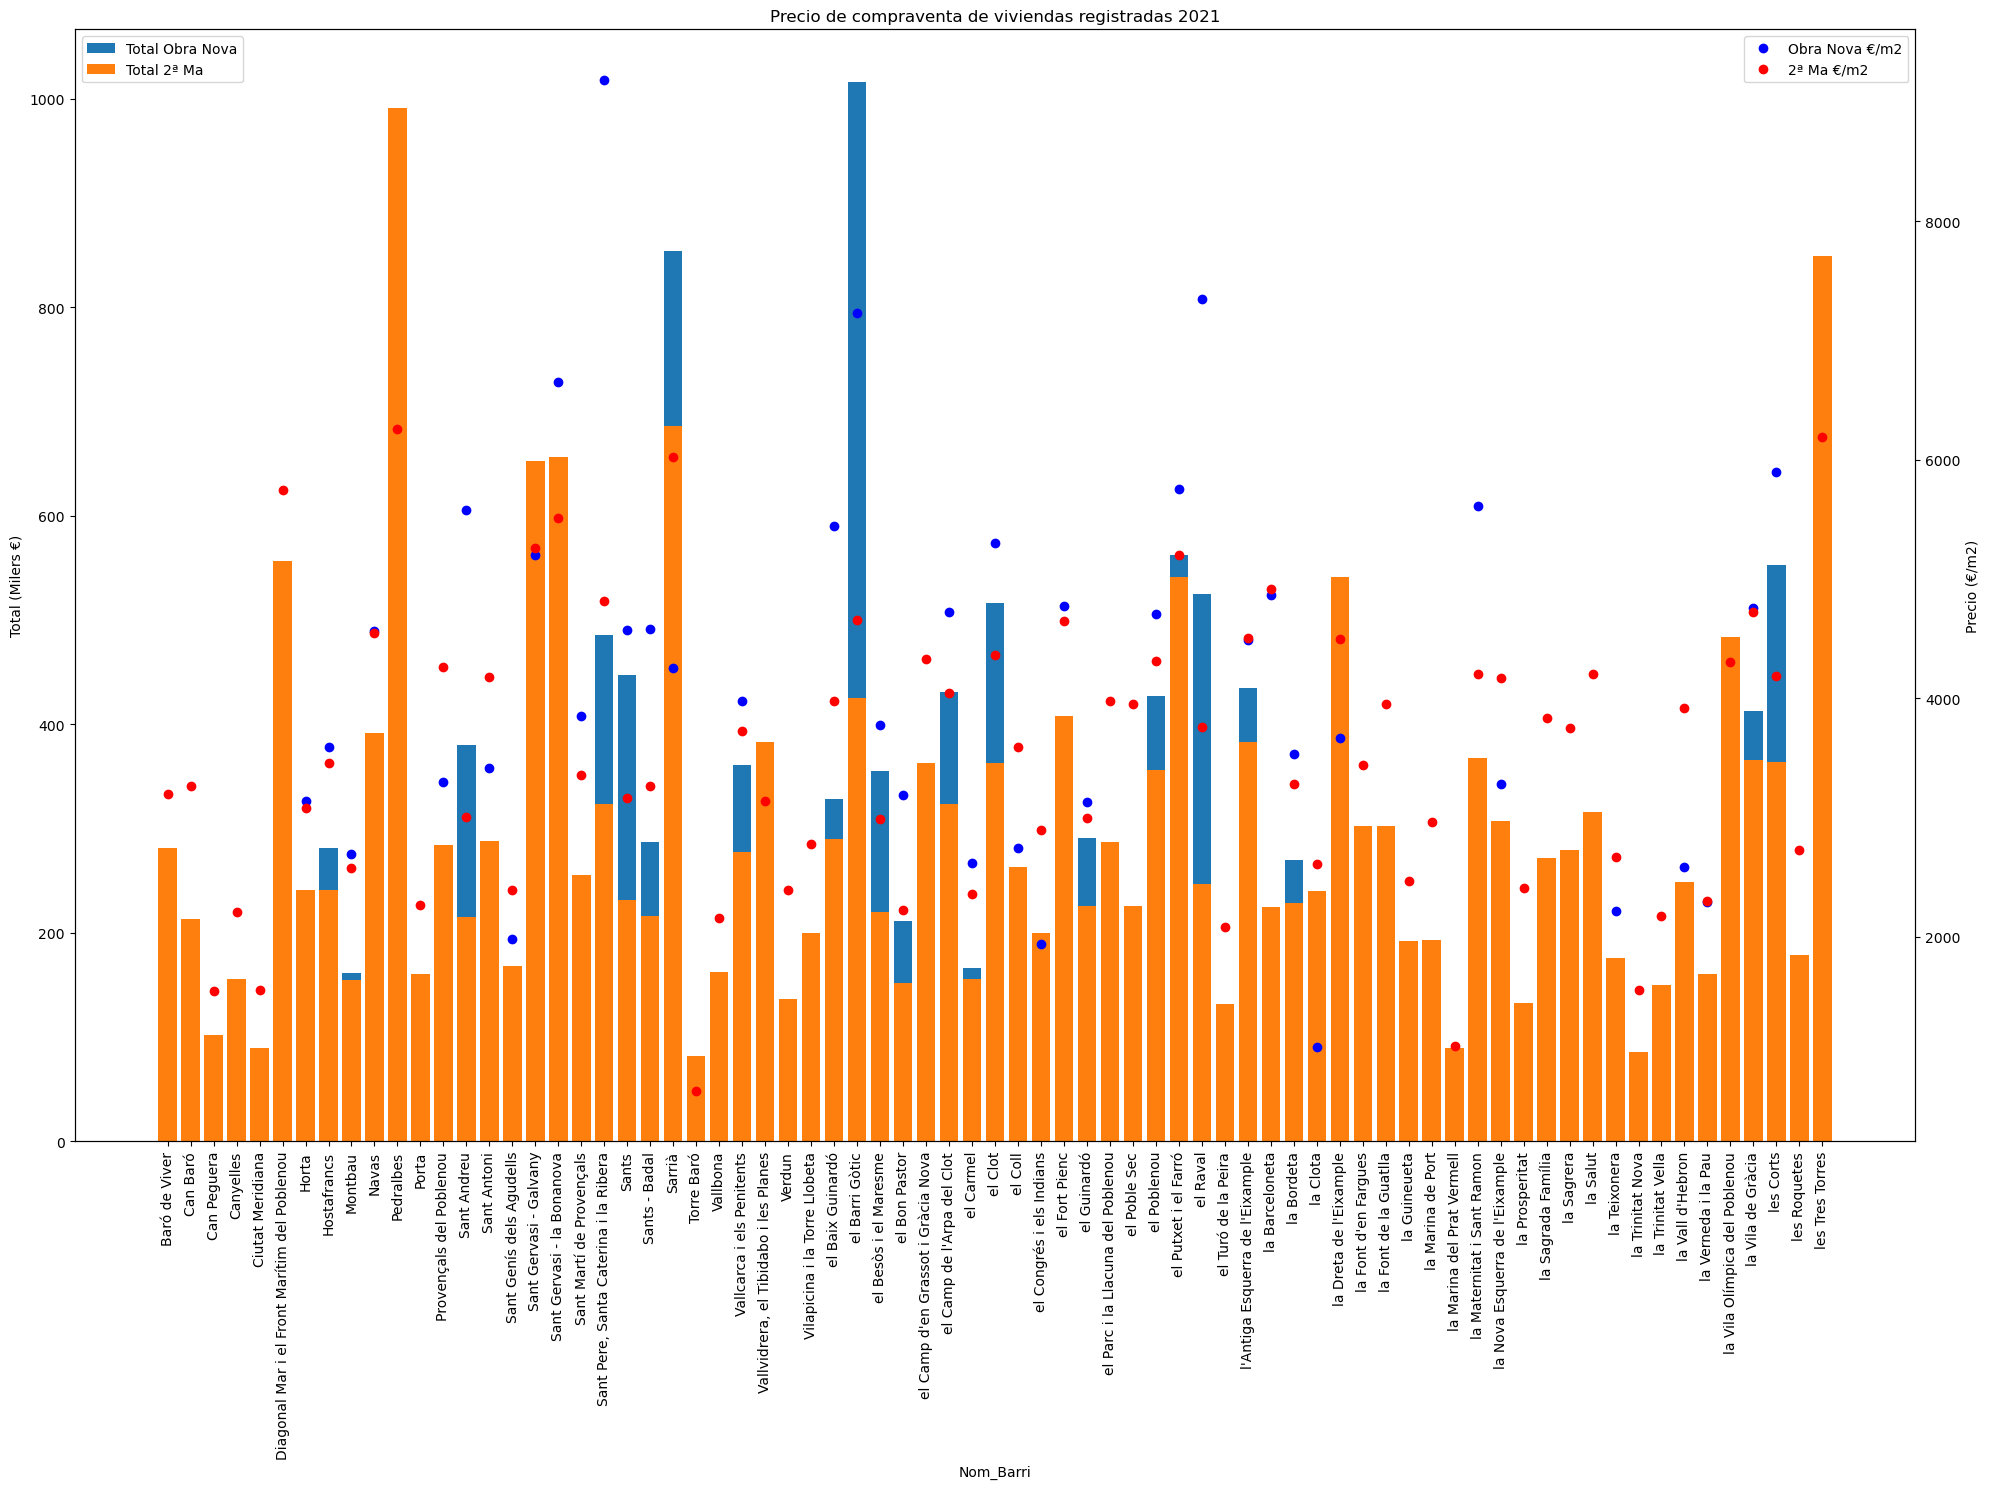

In [269]:
# Filtramos los datos para omitir los valores igual a cero
filtered_df = df_5_precio_medio[df_5_precio_medio != 0]

# Estos son los datos de ejemplo filtrados
nom_barri = filtered_df['Nom_Barri']
total_obra_nova = filtered_df['Total_Obra_Nova_Milers_€']
total_2a_ma = filtered_df['Total_2ª_Ma_Milers_€']
obra_nova_precio_m2 = filtered_df['Obra_Nova_€/m2']
ma_precio_m2 = filtered_df['2ª_Ma_€/m2']

# Creamos la figura con tamaño personalizado
fig, ax1 = plt.subplots(figsize=(20, 15))

# Le decimos que valores deben de tener la grafica de barras / Graficar barras.
ax1.bar(nom_barri, total_obra_nova, label='Total Obra Nova')
ax1.bar(nom_barri, total_2a_ma, label='Total 2ª Ma')
ax1.set_ylabel('Total (Milers €)')

# Creamos el segundo eje y graficar puntos
ax2 = ax1.twinx()
ax2.plot(nom_barri, obra_nova_precio_m2, marker='o', linestyle='None', color='blue', label='Obra Nova €/m2')
ax2.plot(nom_barri, ma_precio_m2, marker='o', linestyle='None', color='red', label='2ª Ma €/m2')
ax2.set_ylabel('Precio (€/m2)')

# Rotamos los nombres de los barrios en el eje x para que no se solapen
ax1.set_xticklabels(nom_barri, rotation=90)

# Mostrar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Configurar título y etiquetas de ejes
plt.title('Precio de compraventa de viviendas registradas 2021')
ax1.set_xlabel('Nom_Barri')

# Ajustar el espaciado de los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Combinar los 5 dataframe

In [270]:
df_concat_Precio_Compraventas_2018_2022 = pd.concat([df_1_pivot, df_2_precio_medio, df_3_precio_medio, df_4_precio_medio, df_5_precio_medio])

In [271]:
df_concat_Precio_Compraventas_2018_2022

,Any,Nom_Barri,Obra_Nova_€/m2,Total_Obra_Nova_Milers_€,2ª_Ma_€/m2,Total_2ª_Ma_Milers_€,Total_€/m2_Milers_€,Total_Milers_€
0,2018,Baró de Viver,NaN,NaN,3196.1,281.3,3196.1,281.3
1,2018,Can Baró,NaN,NaN,3266.0,212.7,3266.0,212.7
2,2018,Can Peguera,NaN,NaN,1542.0,101.8,1542.0,101.8
3,2018,Canyelles,NaN,NaN,2210.2,155.1,2210.2,155.1
4,2018,Ciutat Meridiana,NaN,NaN,1552.2,89.5,1552.2,89.5
...,...,...,...,...,...,...,...,...
68,2018,la Vila Olímpica del Poblenou,NaN,NaN,4304.0,483.7,4304.0,483.7
69,2018,la Vila de Gràcia,4757.1,412.9,4719.3,365.8,4722.1,369.2
70,2018,les Corts,5896.0,552.6,4184.5,363.9,4361.2,383.4
71,2018,les Roquetes,NaN,NaN,2726.5,178.1,2726.5,178.1


Descargar en csv.

In [272]:
df_concat_Precio_Compraventas_2018_2022.to_csv('df_concat_Precio_Compraventas_2018_2022.csv', index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression(random_state = 42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)